In [1]:
from utils import *

# Neural Network

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


def relu(x):
    return np.maximum(0, x)


def relu_derivative(x):
    return np.where(x > 0, 1, 0)


class ScratchNeuralNetwork:

    def __init__(self, input_dim, hidden_dim, learning_rate=0.01, classification=False, epochs=10):
        self.W1 = np.random.rand(input_dim, hidden_dim)
        self.W2 = np.random.rand(hidden_dim, 1)
        self.b1 = np.zeros((1, hidden_dim))
        self.b2 = np.zeros((1, 1))
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_dim = hidden_dim
        self.classification = classification
        self.activation = sigmoid if classification else relu
        self.activation_derivative = sigmoid_derivative if classification else relu_derivative
        self.hidden_output = None

    def forward(self, X):
        self.hidden_output = self.activation(np.dot(X, self.W1) + self.b1)
        output = np.dot(self.hidden_output, self.W2) + self.b2
        return self.activation(output)

    def backward(self, X, y, output):
        error = (output - y)
        error /= X.shape[0]  #divide by batch size?
        if not self.classification:
            error = error * self.activation_derivative(output)
        d_weights2 = np.dot(self.hidden_output.T, error)
        d_bias2 = np.sum(error, axis=0, keepdims=True)

        d_hidden_output = np.dot(error, self.W2.T) * self.activation_derivative(self.hidden_output)
        d_weights1 = np.dot(X.T, d_hidden_output)
        d_bias1 = np.sum(d_hidden_output, axis=0, keepdims=True)

        lr = self.learning_rate

        self.W2 -= lr * d_weights2
        self.b2 -= lr * d_bias2
        self.W1 -= lr * d_weights1
        self.b1 -= lr * d_bias1

    def fit(self, X, y):
        y = y.reshape(-1, 1)
        for i in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.square(output - y))
            print("Epoch ", i, " loss: ", loss)

    def predict(self, X):
        y_pred = self.forward(X)
        if self.classification:
            return np.where(y_pred > 0.5, 1, 0)
        else:
            return y_pred

## Regression

In [3]:
df, train, test, val = get_data(normalize=True, binary_label=False)

### sklearn

In [4]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    # solver='sgd',
    alpha=0.0000,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    shuffle=True,
    random_state=1,
    verbose=True,
    # momentum=0.3
    max_iter=100,
)
rmse_NN_sk = test_model(regressor, train, test, classification=False)

Iteration 1, loss = 93498697.77038790
Iteration 2, loss = 93432062.40464759
Iteration 3, loss = 93293548.64018172
Iteration 4, loss = 93069953.35270239
Iteration 5, loss = 92760638.93848751
Iteration 6, loss = 92382787.90908296
Iteration 7, loss = 91956352.08388145
Iteration 8, loss = 91499833.44672398
Iteration 9, loss = 91026719.75822501
Iteration 10, loss = 90560136.70846792
Iteration 11, loss = 90113265.94776164
Iteration 12, loss = 89693504.91610427
Iteration 13, loss = 89308666.07409894
Iteration 14, loss = 88956998.48968241
Iteration 15, loss = 88642001.42838758
Iteration 16, loss = 88357171.21842405
Iteration 17, loss = 88105014.00186810
Iteration 18, loss = 87878828.59345932
Iteration 19, loss = 87678595.18919952
Iteration 20, loss = 87503312.44308227
Iteration 21, loss = 87349442.94160980
Iteration 22, loss = 87210534.23690429
Iteration 23, loss = 87088145.65057297
Iteration 24, loss = 86977647.78264335
Iteration 25, loss = 86881830.21974926
Iteration 26, loss = 86793663.0772

/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


8289.592600106917

### scratch

In [5]:
df, train, test, val = get_data(normalize=True, binary_label=False)
my_regressor = ScratchNeuralNetwork(input_dim=58, hidden_dim=100, learning_rate=0.00001, epochs=100,
                                    classification=False)
rmse_NN_my = test_model(my_regressor, train, test, classification=False)

Epoch  0  loss:  186243269.33690143
Epoch  1  loss:  186098971.6551389
Epoch  2  loss:  185953268.77152896
Epoch  3  loss:  185805562.18485543
Epoch  4  loss:  185655276.40027347
Epoch  5  loss:  185501903.7962325
Epoch  6  loss:  185345014.663702
Epoch  7  loss:  185184228.3953833
Epoch  8  loss:  185019193.37229562
Epoch  9  loss:  184849648.7311762
Epoch  10  loss:  184675408.003681
Epoch  11  loss:  184496362.45869714
Epoch  12  loss:  184312475.37868577
Epoch  13  loss:  184123754.16902584
Epoch  14  loss:  183930300.89547917
Epoch  15  loss:  183732305.46564612
Epoch  16  loss:  183529959.26958907
Epoch  17  loss:  183323709.1415077
Epoch  18  loss:  183113970.56385392
Epoch  19  loss:  182901188.40310147
Epoch  20  loss:  182685964.25758746
Epoch  21  loss:  182468891.09314483
Epoch  22  loss:  182250663.6319432
Epoch  23  loss:  182031999.17468348
Epoch  24  loss:  181813643.35858518
Epoch  25  loss:  181596302.9346728
Epoch  26  loss:  181380789.07297626
Epoch  27  loss:  1811

8427.343324827922

## Classification

In [6]:
df, train, test, val = get_data(normalize=True, binary_label=True)

### sklearn

In [10]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='logistic',
    learning_rate_init=0.001,
    max_iter=100,
)
accuracy_NN_sk = test_model(classifier, train, test, classification=True)

Time taken to train the model:  18.518577575683594
Binary cross entropy: 12.423673188606026
Predicted mean: 0.5521503342161685 Actual mean: 0.5353764661369655
Accuracy: 0.6553159288687098


/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6553159288687098

### scratch

In [67]:
my_regressor = ScratchNeuralNetwork(input_dim=58, hidden_dim=250, learning_rate=0.1, epochs=200, classification=True)
accuracy_NN_my = test_model(my_regressor, train, test, classification=True)

Epoch  0  loss:  0.45056166141658377
Epoch  1  loss:  0.44984796947303635
Epoch  2  loss:  0.4490844013451975
Epoch  3  loss:  0.4482651134548795
Epoch  4  loss:  0.4473833036835954
Epoch  5  loss:  0.4464310065469873
Epoch  6  loss:  0.4453988357995212
Epoch  7  loss:  0.44427565953025044
Epoch  8  loss:  0.44304818773300764
Epoch  9  loss:  0.44170044459285174
Epoch  10  loss:  0.4402130850742823
Epoch  11  loss:  0.4385624933487692
Epoch  12  loss:  0.43671956043196697
Epoch  13  loss:  0.4346479636023581
Epoch  14  loss:  0.4323016305266573
Epoch  15  loss:  0.42962081302463123
Epoch  16  loss:  0.42652572778429476
Epoch  17  loss:  0.42290589860215877
Epoch  18  loss:  0.4186019787309408
Epoch  19  loss:  0.4133750818117468
Epoch  20  loss:  0.40685884047239707
Epoch  21  loss:  0.39849973210262707
Epoch  22  loss:  0.38751185379717884
Epoch  23  loss:  0.37284637650780855
Epoch  24  loss:  0.35329612570660246
Epoch  25  loss:  0.3288191199312176
Epoch  26  loss:  0.30429191056181

0.6282002774624795

Trying hyperparameters: 100
Epoch  0  loss:  0.43946315923178947
Epoch  1  loss:  0.4368242706479235
Epoch  2  loss:  0.433836907623429
Epoch  3  loss:  0.43042468156088964
Epoch  4  loss:  0.4264818134397438
Epoch  5  loss:  0.42185645998021576
Epoch  6  loss:  0.41632436169298914
Epoch  7  loss:  0.4095497562054382
Epoch  8  loss:  0.40103199667415446
Epoch  9  loss:  0.3900339597047615
Epoch  10  loss:  0.37546256256708954
Epoch  11  loss:  0.355573544362571
Epoch  12  loss:  0.3270970804037427
Epoch  13  loss:  0.28612584913135986
Epoch  14  loss:  0.26621837721958225
Epoch  15  loss:  0.2644431828312395
Epoch  16  loss:  0.2631765000145676
Epoch  17  loss:  0.2618267777471076
Epoch  18  loss:  0.26059449524062256
Epoch  19  loss:  0.25938135607967766
Epoch  20  loss:  0.2582268162794511
Epoch  21  loss:  0.2571113790550144
Epoch  22  loss:  0.25604187500985676
Epoch  23  loss:  0.2550133679135551
Epoch  24  loss:  0.25402619070824006
Epoch  25  loss:  0.2530782501310043
Epoch  26 

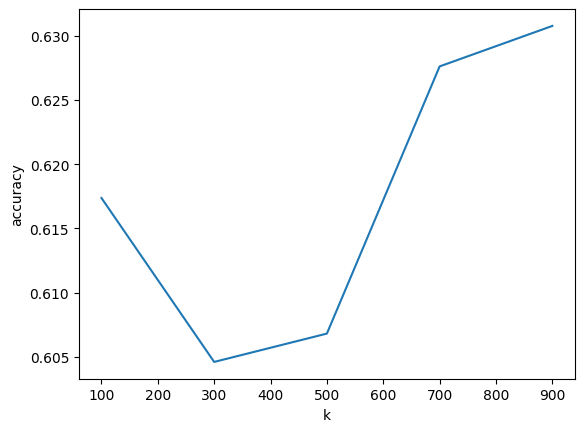

Epoch  0  loss:  0.4578349568922151
Epoch  1  loss:  0.4573587672264122
Epoch  2  loss:  0.45680949279062794
Epoch  3  loss:  0.4561543399016594
Epoch  4  loss:  0.4553444991464062
Epoch  5  loss:  0.45430615762317206
Epoch  6  loss:  0.452924695915888
Epoch  7  loss:  0.4510137613977978
Epoch  8  loss:  0.4482436301294876
Epoch  9  loss:  0.4439393544303865
Epoch  10  loss:  0.4364281441474834
Epoch  11  loss:  0.42024459616868454
Epoch  12  loss:  0.3668301404013627
Epoch  13  loss:  0.4598775711539172
Epoch  14  loss:  0.3963310173571891
Epoch  15  loss:  0.31181031365304807
Epoch  16  loss:  0.5028399964849875
Epoch  17  loss:  0.39214944372268684
Epoch  18  loss:  0.3056492316545478
Epoch  19  loss:  0.49360591253298486
Epoch  20  loss:  0.3955884282979783
Epoch  21  loss:  0.3071789443086307
Epoch  22  loss:  0.49972946887168423
Epoch  23  loss:  0.3926733365034801
Epoch  24  loss:  0.30210452086617096
Epoch  25  loss:  0.4918735800599203
Epoch  26  loss:  0.39522421393402635
Epo

0.48265859503089925

In [17]:
def get_model(param):
    return ScratchNeuralNetwork(input_dim=58, hidden_dim=param, learning_rate=0.2, epochs=100, classification=True)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(100, 1000, 200), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'k', 'accuracy')
best_model = get_model(param=best_param)

accuracy_NN_my = test_model(best_model, train, test, classification=True)

Trying hyperparameters: 0.01
Epoch  0  loss:  0.4350601872707736
Epoch  1  loss:  0.43491163145829836
Epoch  2  loss:  0.43476218644601194
Epoch  3  loss:  0.43461184382575163
Epoch  4  loss:  0.4344605950686487
Epoch  5  loss:  0.43430843152291393
Epoch  6  loss:  0.43415534441157405
Epoch  7  loss:  0.43400132483016096
Epoch  8  loss:  0.43384636374435087
Epoch  9  loss:  0.433690451987552
Epoch  10  loss:  0.43353358025844185
Epoch  11  loss:  0.43337573911845007
Epoch  12  loss:  0.43321691898918746
Epoch  13  loss:  0.4330571101498197
Epoch  14  loss:  0.43289630273438434
Epoch  15  loss:  0.43273448672904974
Epoch  16  loss:  0.4325716519693142
Epoch  17  loss:  0.43240778813714564
Epoch  18  loss:  0.4322428847580584
Epoch  19  loss:  0.4320769311981271
Epoch  20  loss:  0.43190991666093587
Epoch  21  loss:  0.4317418301844616
Epoch  22  loss:  0.43157266063788924
Epoch  23  loss:  0.43140239671835884
Epoch  24  loss:  0.43123102694764154
Epoch  25  loss:  0.4310585396687437
Epo

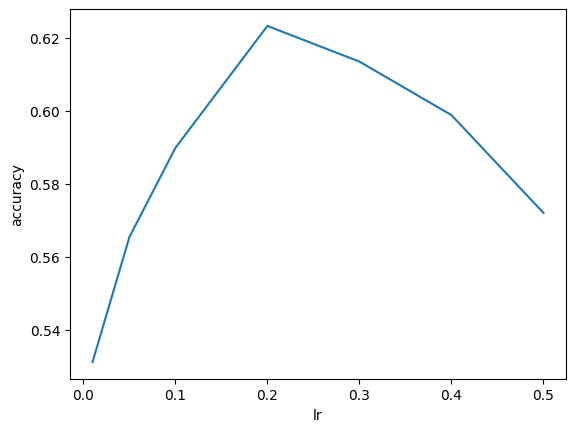

Epoch  0  loss:  0.438479717743933
Epoch  1  loss:  0.4357829749204466
Epoch  2  loss:  0.43274380115171496
Epoch  3  loss:  0.42928931013118427
Epoch  4  loss:  0.42532249775120146
Epoch  5  loss:  0.4207112650432621
Epoch  6  loss:  0.41527099556047853
Epoch  7  loss:  0.4087362581031845
Epoch  8  loss:  0.40071418016337146
Epoch  9  loss:  0.3906082550903353
Epoch  10  loss:  0.3774989854471186
Epoch  11  loss:  0.3599642643013764
Epoch  12  loss:  0.3357419789291866
Epoch  13  loss:  0.30051915571551824
Epoch  14  loss:  0.262298752128422
Epoch  15  loss:  0.25982734319083073
Epoch  16  loss:  0.2584879883329887
Epoch  17  loss:  0.25770543080169006
Epoch  18  loss:  0.2568511550947088
Epoch  19  loss:  0.2560836921861584
Epoch  20  loss:  0.2553124462602891
Epoch  21  loss:  0.2545720878233603
Epoch  22  loss:  0.25384626409767963
Epoch  23  loss:  0.2531414494903068
Epoch  24  loss:  0.252454239752651
Epoch  25  loss:  0.2517855941610434
Epoch  26  loss:  0.2511345425848607
Epoch

0.6177323748265859

In [18]:
def get_model(param):
    return ScratchNeuralNetwork(input_dim=58, hidden_dim=100, learning_rate=param, epochs=100, classification=True)


best_param, params, accuracies = optimize_hyperparameters(get_model, (0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5), train, test,
                                                          val,
                                                          classification=True)
plot_2d(params, accuracies, 'lr', 'accuracy')
best_model = get_model(param=best_param)

accuracy_NN_my = test_model(best_model, train, test, classification=True)

#TEST

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000
)
regressor = MLPRegressor(
    hidden_layer_sizes=(400, 300, 200, 20),
    activation='logistic',
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.0001,
    power_t=0.4,
    max_iter=500,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.8,
    beta_2=0.9,
    epsilon=1e-08,
    n_iter_no_change=20,
    max_fun=15000
)
test_model(regressor, train_x, train_y, test_x, test_y)
